##### 16 Feb 2021

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Cab_Rides.csv')

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

We clearly see two columns that should be datetime category.  
We need to convert them into such.

In [6]:
df.columns=df.columns.str.replace('*','')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
df.START_DATE = pd.to_datetime(df.START_DATE)
df.END_DATE = pd.to_datetime(df.END_DATE)
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [8]:
df.nunique()

START_DATE    1154
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          256
PURPOSE         10
dtype: int64

In [9]:
df.CATEGORY.value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

In [10]:
df.PURPOSE.value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: PURPOSE, dtype: int64

In [11]:
df['DURATION'] = df.END_DATE - df.START_DATE
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [12]:
df.groupby(['PURPOSE'])['MILES'].mean().round(3)

PURPOSE
Airport/Travel       5.500
Between Offices     10.944
Charity ($)         15.100
Commute            180.200
Customer Visit      20.688
Errand/Supplies      3.969
Meal/Entertain       5.698
Meeting             15.248
Moving               4.550
Temporary Site      10.474
Name: MILES, dtype: float64

In [13]:
df.groupby(['PURPOSE'])['MILES'].min().round(3)

PURPOSE
Airport/Travel       4.1
Between Offices      1.9
Charity ($)         15.1
Commute            180.2
Customer Visit       0.8
Errand/Supplies      0.5
Meal/Entertain       0.6
Meeting              0.7
Moving               3.3
Temporary Site       1.8
Name: MILES, dtype: float64

In [14]:
df.groupby(["PURPOSE"])['MILES'].max().round(3)

PURPOSE
Airport/Travel       7.6
Between Offices     39.2
Charity ($)         15.1
Commute            180.2
Customer Visit     310.3
Errand/Supplies     22.3
Meal/Entertain      36.5
Meeting            201.0
Moving               6.1
Temporary Site      48.2
Name: MILES, dtype: float64

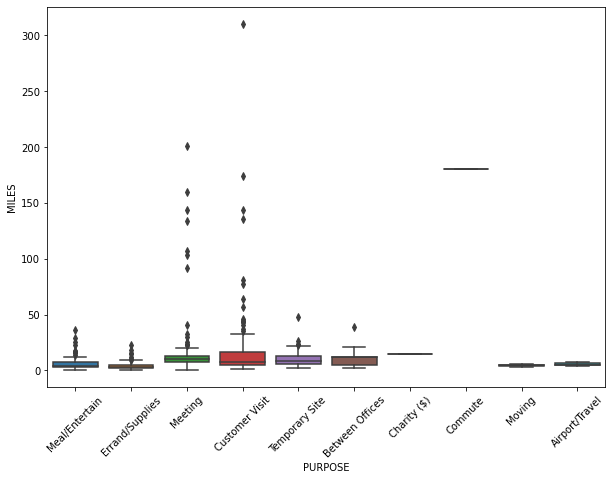

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation=45);

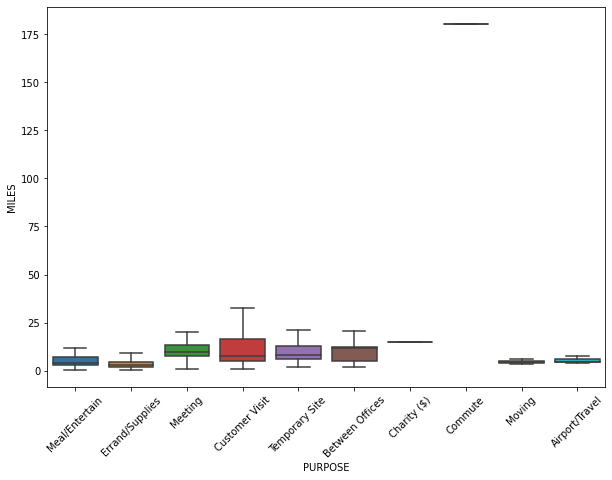

In [16]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES,showfliers=False)
plt.xticks(rotation=45);

In [17]:
df_new = df[df['PURPOSE'].isin(['Commute','Charity ($)','Moving','Airport/Travel']) == False]

In [18]:
df_new.shape

(1146, 8)

In [19]:
df_new.PURPOSE.value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Name: PURPOSE, dtype: int64

In [20]:
df_new.groupby(df_new.PURPOSE)['MILES'].mean().round(3)

PURPOSE
Between Offices    10.944
Customer Visit     20.688
Errand/Supplies     3.969
Meal/Entertain      5.698
Meeting            15.248
Temporary Site     10.474
Name: MILES, dtype: float64

In [21]:
df_na = df[df.PURPOSE.isna()]
df_na.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,0 days 00:12:00
32,2016-01-19 09:09:00,2016-01-19 09:23:00,Business,Whitebridge,Lake Wellingborough,7.2,NaN,0 days 00:14:00
85,2016-02-09 10:54:00,2016-02-09 11:07:00,Personal,Whitebridge,Northwoods,5.3,NaN,0 days 00:13:00
86,2016-02-09 11:43:00,2016-02-09 11:50:00,Personal,Northwoods,Tanglewood,3.0,NaN,0 days 00:07:00
87,2016-02-09 13:36:00,2016-02-09 13:52:00,Personal,Tanglewood,Preston,5.1,NaN,0 days 00:16:00


In [50]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')

df_a = df.dropna()

X = df_a[['CATEGORY','MILES']]
y = df_a.PURPOSE

X = pd.get_dummies(X, drop_first = True)

dtree.fit(X,y)

X_na = df_na[['CATEGORY','MILES']]

X_na = pd.get_dummies(X_na, drop_first = True)

preds = dtree.predict(X_na)

In [34]:
df_na.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE', 'DURATION'],
      dtype='object')

In [57]:
purpose_preds = pd.Series(preds)
purpose_preds

0      Meal/Entertain
1      Customer Visit
2              Moving
3              Moving
4              Moving
            ...      
497    Customer Visit
498    Customer Visit
499    Meal/Entertain
500    Customer Visit
501    Customer Visit
Length: 502, dtype: object

In [64]:
X_na['PURPOSE'] = dtree.predict(X_na)

In [67]:
df['PURPOSE'].isna() = dtree.predict(X_na)

SyntaxError: cannot assign to function call (<ipython-input-67-d7e3135a7043>, line 1)